### *Generating Histogram and Dist Plot*
*Histogram ve yoğunluk grafikleri, sayısal değişkenlerin dağılımını ifade etmek için kullanılan veri görselleştirme teknikleridir.*

In [3]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


c:\Users\HUSEY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

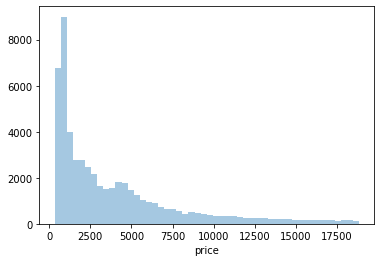

In [4]:
# distplot(): Dağılım görselleştirmek için kullanılan bir fonksiyondur.
# kde: Bu, yoğunluk fonksiyonun da grafiğin üzerine koyulup koyulmaması ile ilgili bir ayarlama yapıyor.
sns.distplot(df.price, kde= False)

<AxesSubplot:xlabel='price'>

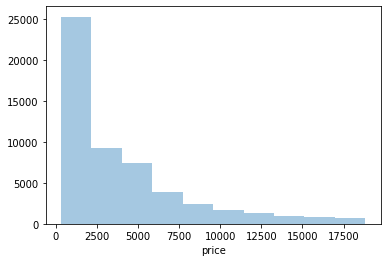

In [5]:
# bins: aralıklarla ilgilidir, buraya yazılan değer kadar kutu, çubuk sayısı ayarlar.
sns.distplot(df.price, bins= 10, kde= False)

<AxesSubplot:xlabel='price', ylabel='Density'>

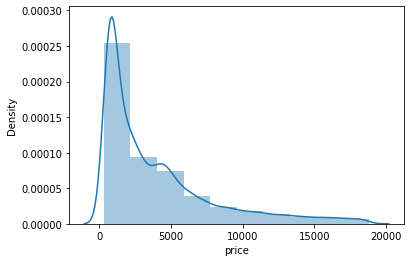

In [6]:
# Histogram ve yoğunluk grafiği birlikte kullanılacağı zaman Seaborn arka tarafta ölçeği 
# 0-1 arasına aslında bakarsanız yoğunluk fonksiyonunun ölçeğine göre gerçekleştirip 
# bu ölçeğe göre indirgeyip histogramla yoğunluk grafiğini birlikte sunma imkanı veriyor.
# Ölçek dediğimiz y ekseninde gözüken değerlerdir.
sns.distplot(df.price, bins= 10, kde= True)

c:\Users\HUSEY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


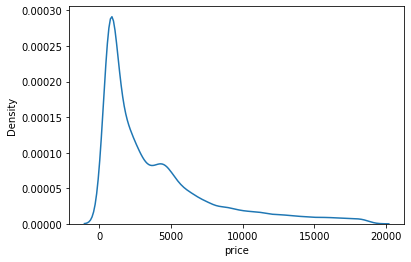

In [7]:
# Sadece yoğunluk grafiği olsun, histogramı gösterme diyorsak "hist" argümanını False yaparız
sns.distplot(df.price, hist= False);

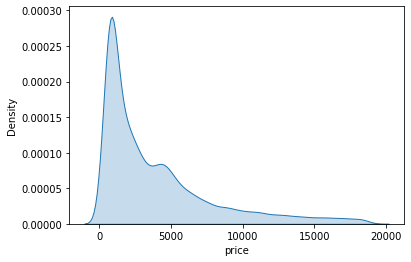

In [8]:
# Dağılım grafiğinin altını da doldurarak, boyayarak gelmesi için bunu kullanırız!
sns.kdeplot(df.price, shade= True);

# NOT: Grafiğin altını boyama işini shade= True argümanı sağlar. Fakat bu argüman distplot'ta 
# tanımlı olmadığı için, bu argümanın tanımlı olduğu kdeplot fonksiyonunu kullanırız.

### *Histogram ve Yoğunluk Çaprazlamalar*

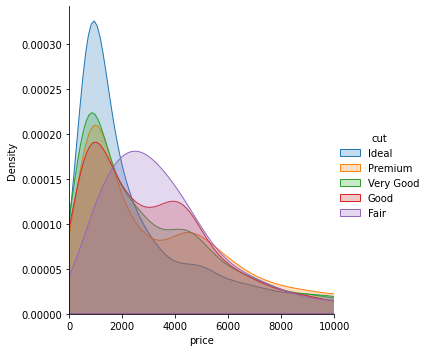

In [9]:
'''
map(fonksiyonAdi, listeAdi): Parametre olarak aldığı fonksiyona, parametre olarak aldığı listenin her elemanını sırasıyla parametre
olarak gönderir. Diğer bir deyişle Map fonksiyonu parametre olarak fonksiyon ve liste, demet gibi döngüye sokulabilecek veri alır.
map, döngü yazmadan döngünün yapabileceği işlemi kolayca yapmamızı sağlar.
'''

# hue: boyut ekleme argümanıdır.
# FacetGrid(): Grafik üzerine eklenen boyutları bölerek göstermek için kullanılır.
(sns
 .FacetGrid(df,
              hue= "cut",
              height= 5,
              xlim= (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend() # bilgi eklemek için
);

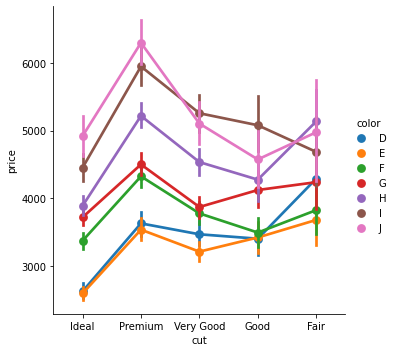

In [13]:
# kind: tür demek. Bu örnekte  kind= "point" diyerek grafikte noktalı ifadeler olsun diyoruz
sns.catplot(x= "cut", y= "price", hue= "color", kind= "point", data= df);